In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#importamos el dataset MNIST de keras.
from tensorflow.keras.datasets import mnist

#sklern, pqra enmascarar las variables categòricas.
from sklearn.preprocessing import LabelEncoder

In [2]:
#lectura del dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



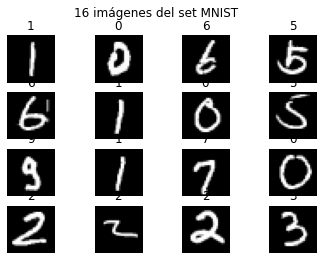

In [3]:
# Visualizaremos 16 imágenes aleatorias tomadas del set x_train
ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [4]:
# Pre-procesamiento:
# Se aplanan cada una de las imágenes en un vector de 28x28 = 784 valores, al final,
# quedaran de la siguiente forma: x_train.shape=  (60000, 784) , x_test.shape=  (10000, 784)

X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) ) 
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

X_train.shape

(60000, 784)

In [5]:
# Adicionalmente se normalizarán las intensidades al rango 0-1
X_train = X_train/255.0
X_test = X_test/255.0

#255 es el número mayor en el set de datos

In [6]:
# Finalmente, convertimos y_train y y_test a representación "one-hot"
nclasses = 10
Y_train = to_categorical(y_train,nclasses)
Y_test =  to_categorical(y_test,nclasses)

In [7]:
print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000, 10)


In [8]:
np.random.seed(1)		# Para reproducibilidad del entrenamiento
input_dim =  X_train.shape[1] #784
output_dim = Y_train.shape[1] #10

#Sequential, es para configurar 
modelo = Sequential()

#Capa de entrada, con 15 neuronas y función de activacion: relu.
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))

#Capa de salida
modelo.add( Dense(output_dim, activation='softmax'))

#En la capa de salida es: output_dim, 
#porque son 10 los posibles valores que toma la variable objetivo.

print(modelo.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada (categorical_crossentropy), métrica de desempeño: (accuracy) precisión.

sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Para el entrenamiento se usarán 30 iteraciones y un batch_size de 1024
num_epochs = 50
batch_size = 1024 # 2
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
59/59 [==============================] - 0s 5ms/step - loss: 1.0822 - accuracy: 0.6916
Epoch 2/50
59/59 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.8749
Epoch 3/50
59/59 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8956
Epoch 4/50
59/59 [==============================] - 0s 5ms/step - loss: 0.3371 - accuracy: 0.9044
Epoch 5/50
59/59 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.9087
Epoch 6/50
59/59 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.9121
Epoch 7/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.9160
Epoch 8/50
59/59 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.9182
Epoch 9/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.9202
Epoch 10/50
59/59 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.9222
Epoch 11/50
59/59 [

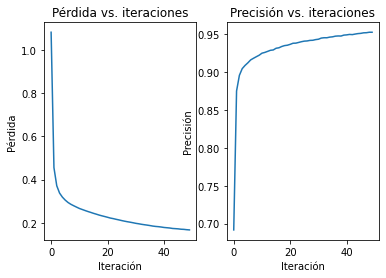

In [10]:
# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

#En el grafico de la izquierda:
#A medida que itera(epoch) el modelo, el error(perdida) disminuye.

#En el grafico de la derecha:
#A medida que itera(epoch) el modelo, la precisión(accuracy) aumenta.

In [11]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

#puntaje=[0.18301233649253845, 0.9478999972343445]

# Realizar predicción sobre el set de validación y mostrar algunos ejemplos
# de la clasificación resultante
#Y_pred = modelo.predict_classes(X_test)

#Entrenamiento: 95.17%
#Validacion: 94.8%

Precisión en el set de validación: 94.6%
